In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
data = np.array([[ 7.64598943, 1.46864676],
 [ 3.14190822, 5.71573667],
 [ 7.46234694, 1.61464996],
 [ 6.93969708, 1.19067627],
 [12.59907318, 8.43868537],
 [ 2.43219458, 5.80899481],
 [19.13544561,13.93176107],
 [19.17136655,18.87188511],
 [22.89401714,15.99968114],
 [17.37525349,16.61737278],
 [11.66971956,10.38003869],
 [12.96814862, 8.54246911],
 [ 4.33913324, 6.02893154],
 [ 3.87821809, 6.19812515],
 [12.54091894,11.6769725 ],
 [18.67163128,17.69932466],
 [ 7.23104318, 2.07816084],
 [ 7.32503788, 2.79280641],
 [ 7.10297809, 1.58982221],
 [ 6.76014355, 1.25555635],
 [ 1.79208338, 5.13919823],
 [ 2.97256207, 5.20531634],
 [ 3.2584194 , 6.7250793 ],
 [19.30890173,18.58158733],
 [ 3.35342247, 4.81401353],
 [11.89501722,11.89956365],
 [13.04118315,10.30590179],
 [20.16988012,16.80176926],
 [12.56729969,10.90767059],
 [12.69174585,10.37315724],
 [ 6.12805444, 1.137865 ],
 [ 1.87713678, 4.66277994],
 [21.96302898,17.98483831],
 [ 2.26338876, 5.23695753],
 [24.85740572,18.07361877],
 [12.49562013,11.2617499 ],
 [19.64684027,16.39978116],
 [22.49654084,19.39766035],
 [ 2.57015603, 6.37635922],
 [13.63806524,11.90691939],
 [ 7.27800763, 2.18532071],
 [ 7.24987195, 2.23099101],
 [ 6.77327696, 1.55908412],
 [12.36695055,12.67903957]])

<h3> Метод локтя

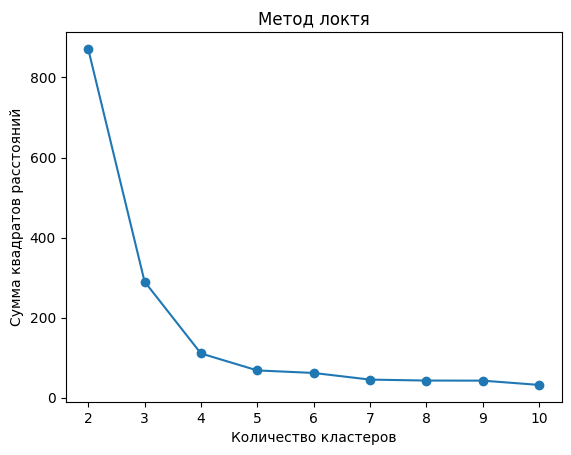

In [6]:
inertia_values = []
# Перебираем количество кластеров
for k in range(2, 11):
    # объект KMeans с текущим количеством кластеров
    kmeans = KMeans( n_clusters = k)
    kmeans.fit( data )
    # Сохраняем значение инерции - мерой компактности кластеров.
    # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом
    inertia_values.append( kmeans.inertia_ )

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()

<h4>Метод локтя показывает, что сумма квадротов расстояний от точек до ближайших центроидов существенно не меняется после указания 4 и 5 кластеров.
Таким образом, достаточным считаем 4 или 5 кластеров

<h5> Проверка для 4 кластеров <h5>


Метки кластеров:
[3 1 3 3 2 1 0 0 0 0 2 2 1 1 2 0 3 3 3 3 1 1 1 0 1 2 2 0 2 2 3 1 0 1 0 2 0
 0 1 2 3 3 3 2]
Координаты центроидов кластеров:
[[20.51730107 17.30538909]
 [ 2.89805664  5.62831748]
 [12.58852201 10.76110616]
 [ 7.08149519  1.73668906]]
В кластере с меткой 0 содержится 11 точек
В кластере с меткой 1 содержится 11 точек
В кластере с меткой 2 содержится 11 точек
В кластере с меткой 3 содержится 11 точек


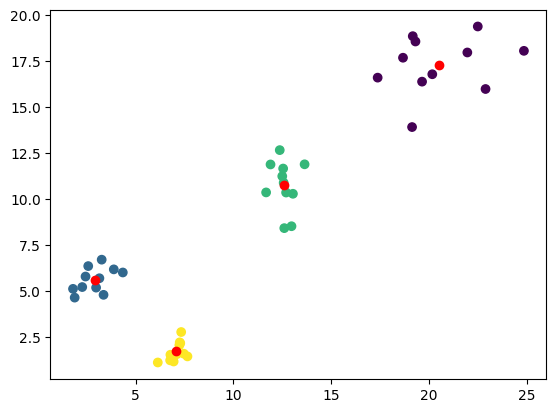

In [7]:
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(data)

# метки кластеров для каждого объекта
labels = kmeans.labels_

# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)

print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
    print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()

<h5> Проверка для 5 кластеров

Метки кластеров:
[3 0 3 3 2 0 1 1 4 1 2 2 0 0 2 1 3 3 3 3 0 0 0 1 0 2 2 1 2 2 3 0 4 0 4 2 1
 4 0 2 3 3 3 2]
Координаты центроидов кластеров:
[[ 2.89805664  5.62831748]
 [19.06847415 16.98621162]
 [12.58852201 10.76110616]
 [ 7.08149519  1.73668906]
 [23.05274817 17.86394964]]
В кластере с меткой 0 содержится 11 точек
В кластере с меткой 1 содержится 7 точек
В кластере с меткой 2 содержится 11 точек
В кластере с меткой 3 содержится 11 точек
В кластере с меткой 4 содержится 4 точек


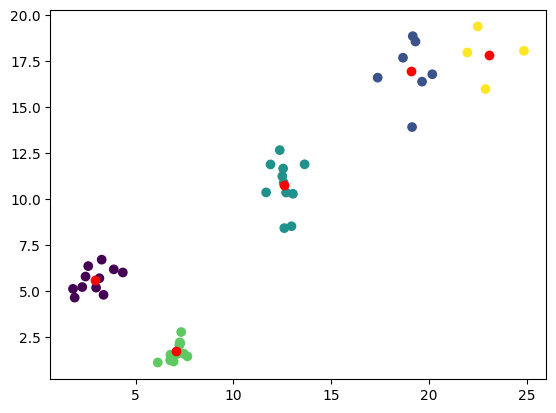

In [8]:
kmeans = KMeans(n_clusters=5)

# Производим кластеризацию данных
kmeans.fit(data)

# метки кластеров для каждого объекта
labels = kmeans.labels_

# координаты центроидов
centroids = kmeans.cluster_centers_

print("Метки кластеров:")
print(labels)

print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
    print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()

<h3>Метод силуэта

<h4>Проверим методом силуэта достачное количество кластеров

In [9]:
km_silhouette = []

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state = 42).fit(data)
    preds = km.predict(data)

    silhouette = silhouette_score(data, preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))



Silhouette score for number of cluster(s) 2: 0.6105481788554362
Silhouette score for number of cluster(s) 3: 0.7023084169801868
Silhouette score for number of cluster(s) 4: 0.7709783990307216
Silhouette score for number of cluster(s) 5: 0.7144397142737157
Silhouette score for number of cluster(s) 6: 0.6863527108497149
Silhouette score for number of cluster(s) 7: 0.643141445715663
Silhouette score for number of cluster(s) 8: 0.5955359413634913
Silhouette score for number of cluster(s) 9: 0.5783402986009396
Silhouette score for number of cluster(s) 10: 0.6243505801592435
Silhouette score for number of cluster(s) 11: 0.6324231433376867
Silhouette score for number of cluster(s) 12: 0.5831887766161588
Silhouette score for number of cluster(s) 13: 0.4755491952889027
Silhouette score for number of cluster(s) 14: 0.45842855651747116


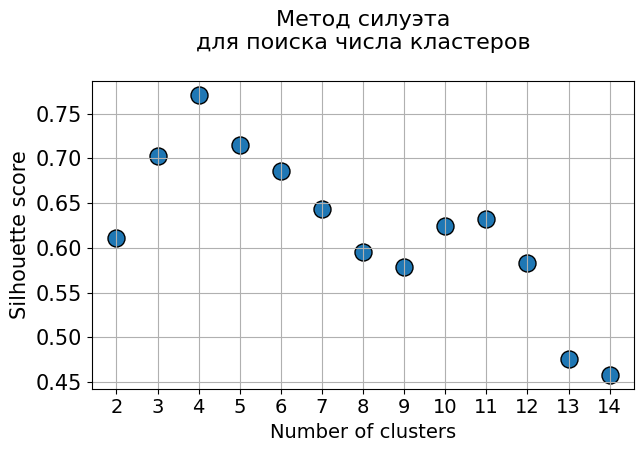

In [10]:
plt.figure(figsize=(7,4))
plt.title("Метод силуэта\nдля поиска числа кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

<p>Метод силуэта показывает, что оптимальное количество кластеров для набора данных равняется 4

Метки кластеров:
[3 0 3 3 2 0 1 1 1 1 2 2 0 0 2 1 3 3 3 3 0 0 0 1 0 2 2 1 2 2 3 0 1 0 1 2 1
 1 0 2 3 3 3 2]
Координаты центроидов кластеров:
[[ 2.89805664  5.62831748]
 [20.51730107 17.30538909]
 [12.58852201 10.76110616]
 [ 7.08149519  1.73668906]]
В кластере с меткой 0 содержится 11 точек
В кластере с меткой 1 содержится 11 точек
В кластере с меткой 2 содержится 11 точек
В кластере с меткой 3 содержится 11 точек


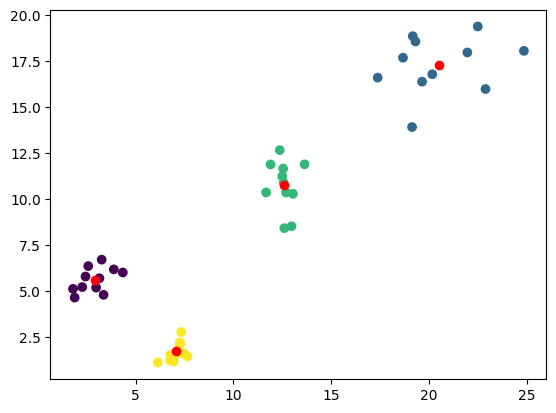

In [11]:
# Кластеризация
kmeans = KMeans(n_clusters=4, random_state = 10)
kmeans.fit(data)
labels = kmeans.labels_

# Центроиды
centroids = kmeans.cluster_centers_

print("Метки кластеров:")
print(labels)

print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
    print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()



<h3>Выполнить кластеризацию с визуализацией для 3 любых различных значений
параметра random_state 

<h5>4 кластера

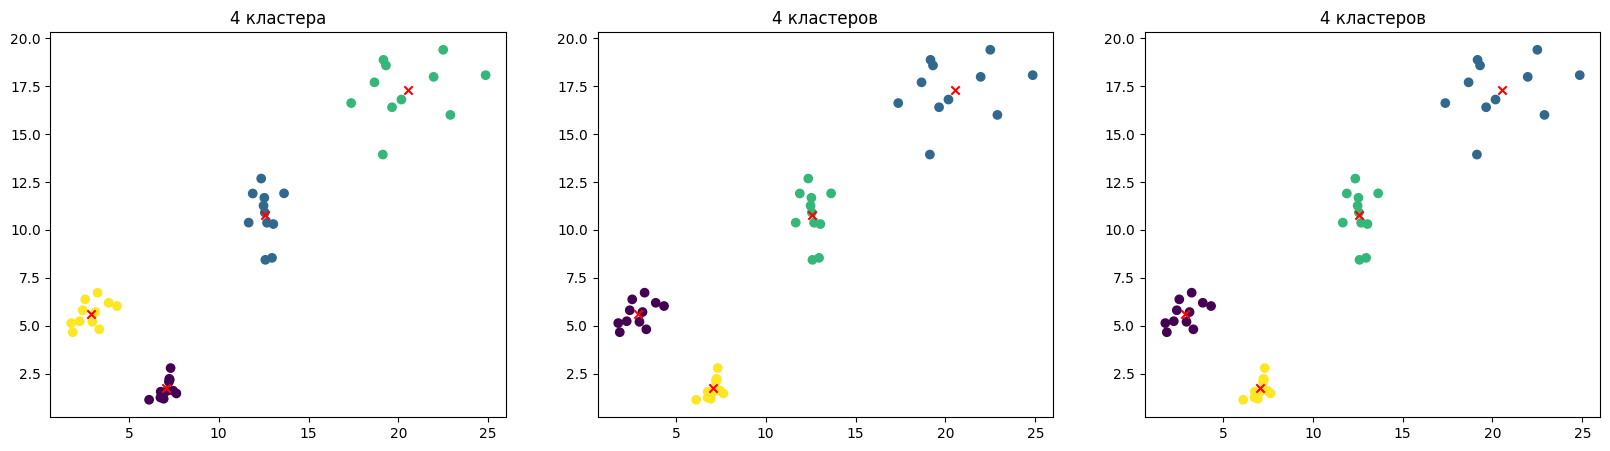

In [16]:
# Кластеризация
kmeans_4_1 = KMeans(n_clusters=4, random_state=1)
kmeans_4_1.fit(data)
labels_4_1 = kmeans_4_1.labels_
centroids_4_1 = kmeans_4_1.cluster_centers_

kmeans_4_2 = KMeans(n_clusters=4, random_state=3)
kmeans_4_2.fit(data)
labels_4_2 = kmeans_4_2.labels_
centroids_4_2 = kmeans_4_2.cluster_centers_

kmeans_4_3 = KMeans(n_clusters=4, random_state=10)
kmeans_4_3.fit(data)
labels_4_3 = kmeans_4_3.labels_
centroids_4_3 = kmeans_4_3.cluster_centers_

# Создание первого графика с 4 кластерами 
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_4_1)
plt.scatter(centroids_4_1[:, 0], centroids_4_1[:, 1], c="r", marker="x")
plt.title("4 кластера")

# Создание второго графика с 4 кластерами
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_4_2)
plt.scatter(centroids_4_2[:, 0], centroids_4_2[:, 1], c="r", marker="x")
plt.title("4 кластеров")

plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=labels_4_3)
plt.scatter(centroids_4_3[:, 0], centroids_4_3[:, 1], c="r", marker="x")
plt.title("4 кластеров")


plt.show()

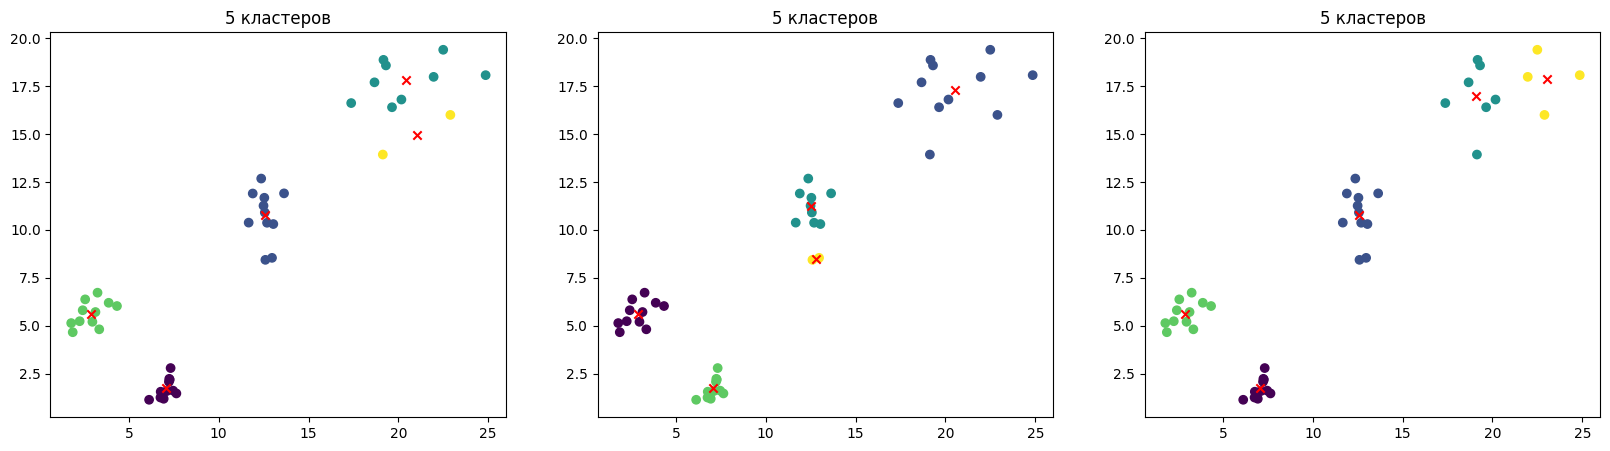

In [28]:
kmeans_5_1 = KMeans(n_clusters=5, random_state=1)
kmeans_5_1.fit(data)
labels_5_1 = kmeans_5_1.labels_
centroids_5_1 = kmeans_5_1.cluster_centers_

kmeans_5_2 = KMeans(n_clusters=5, random_state=3)
kmeans_5_2.fit(data)
labels_5_2 = kmeans_5_2.labels_
centroids_5_2 = kmeans_5_2.cluster_centers_

kmeans_5_3 = KMeans(n_clusters=5, random_state=42)
kmeans_5_3.fit(data)
labels_5_3 = kmeans_5_3.labels_
centroids_5_3 = kmeans_5_3.cluster_centers_

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_5_1)
plt.scatter(centroids_5_1[:, 0], centroids_5_1[:, 1], c="r", marker="x")
plt.title("5 кластеров")

plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_5_2)
plt.scatter(centroids_5_2[:, 0], centroids_5_2[:, 1], c="r", marker="x")
plt.title("5 кластеров")

plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=labels_5_3)
plt.scatter(centroids_5_3[:, 0], centroids_5_3[:, 1], c="r", marker="x")
plt.title("5 кластеров")

plt.show()